In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
! ls csv/feature_evaluation

FashionMNIST_rbf_rff.csv	 FashionMNIST_real_opu_4.csv
FashionMNIST_real_opu_2_10k.csv  FashionMNIST_sim_opu_2.csv
FashionMNIST_real_opu_2.csv	 FashionMNIST_sim_opu_4.csv
FashionMNIST_real_opu_4_10k.csv  FashionMNIST_sim_opu_6.csv


In [30]:
! ls csv/kernel_evaluation

FashionMNIST_linear.csv     FashionMNIST_sim_opu_4.csv
FashionMNIST_rbf_rff.csv    FashionMNIST_sim_opu_6.csv
FashionMNIST_sim_opu_2.csv


In [60]:
rbf_features = pd.read_csv('csv/feature_evaluation/FashionMNIST_rbf_rff.csv')

In [67]:
sim_orf_2_features = pd.read_csv('csv/feature_evaluation/FashionMNIST_sim_opu_2.csv')
sim_orf_4_features = pd.read_csv('csv/feature_evaluation/FashionMNIST_sim_opu_4.csv')

In [62]:
rbf_limit = pd.read_csv('csv/kernel_evaluation/FashionMNIST_rbf_rff.csv').iloc[0]['test_score']

In [63]:
lin_limit = pd.read_csv('csv/kernel_evaluation/FashionMNIST_linear.csv').iloc[0]['test_score']

In [68]:
sim_orf_2_limit = pd.read_csv('csv/kernel_evaluation/FashionMNIST_sim_opu_2.csv').iloc[0]['test_score']
sim_orf_4_limit = pd.read_csv('csv/kernel_evaluation/FashionMNIST_sim_opu_4.csv').iloc[0]['test_score']

In [69]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [140]:
def plot_misclassification_errors(dataframes, feature_labels, f_colors,
                                  kernel_limits, kernel_labels, k_colors,
                                  x_start, x_end, x_ticks, legend):
    
    plt.figure(figsize=(16,10))
    
    for label, color, dataframe in zip(feature_labels, f_colors, dataframes):
        x_values = sorted(dataframe['num_features'].unique())
        x_values = [x_val for x_val in x_values if (x_val >= x_start and x_val <= x_end)]

        y_means = []
        y_stds = []

        for x_val in x_values:
            ys = (1 - dataframe.query('num_features == "{}"'.format(x_val))['test_score'])
            y_means.append(ys.mean())
        # print(label, y_means)
        
        plt.plot(x_values, y_means,
                 linestyle='dotted', marker='^',
                 label=label, color=color,
                 linewidth=4, markersize=10,
                 markeredgewidth=4)
    
    # limit_labels = ['Linear Kernel', 'OPU Kernel (m=2)', 'OPU Kernel (m=4)', 'RBF Kernel']
    for label, color, limit in zip(kernel_labels, k_colors, kernel_limits):
        if limit is not None:
            plt.axhline(1-limit, label=label + ' ({:.4f})'.format(1-limit), color=color, linewidth=4)
        
    if legend:
        plt.legend(loc='upper right')
    #plt.xlim((0, 100000))
    plt.xscale('log')
    plt.xlim(left=x_start, right=x_end)
    # plt.yscale('log')
    plt.xlabel(r'Projection Dimension $D$', labelpad=20)
    plt.ylabel('Classification Error')
    plt.title('Kernel Ridge Regression on Fashion MNIST')
    from matplotlib.ticker import ScalarFormatter, NullFormatter
    # for axis in [ax.xaxis, ax.yaxis]:
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    if len(x_ticks)>0:
        plt.xticks(x_values, x_ticks)
    
    # plt.savefig('figures/fashion_mnist.pdf', format='pdf')
    # plt.ylim((0.075, 0.25))
    plt.show()

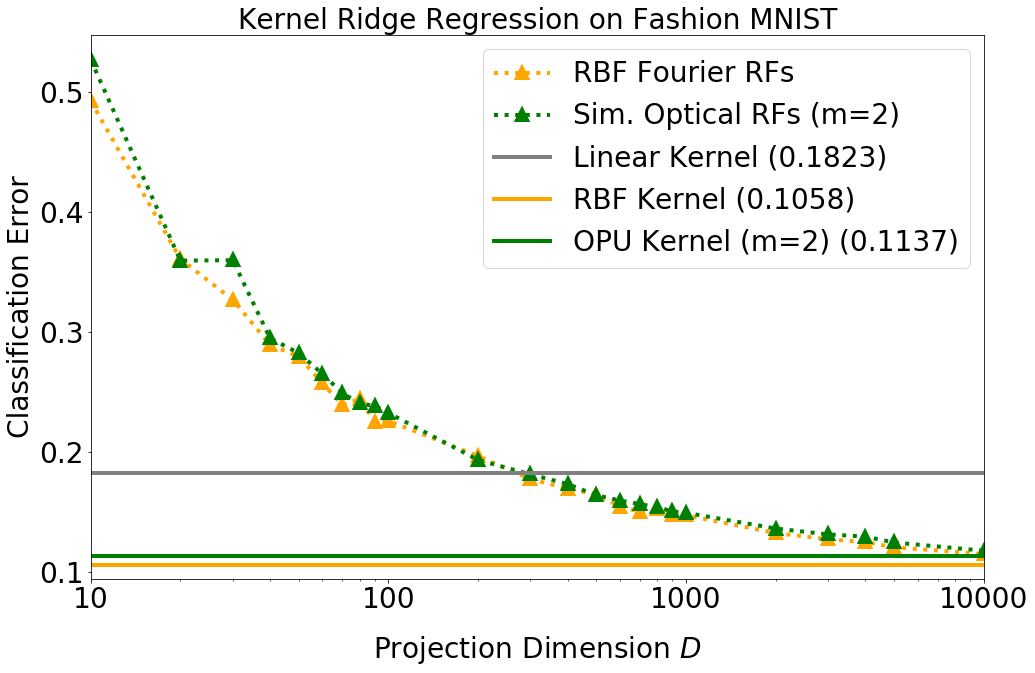

In [141]:
plot_misclassification_errors(
    [rbf_features, sim_orf_2_features],
    ['RBF Fourier RFs', 'Sim. Optical RFs (m=2)'],
    ['orange', 'green', 'blue', 'red'],
    [lin_limit, rbf_limit, sim_orf_2_limit],
    ['Linear Kernel', 'RBF Kernel', 'OPU Kernel (m=2)'],
    ['grey', 'orange', 'green', 'blue', 'red'],
    x_start=10, x_end=10000, x_ticks=[], legend=True
)

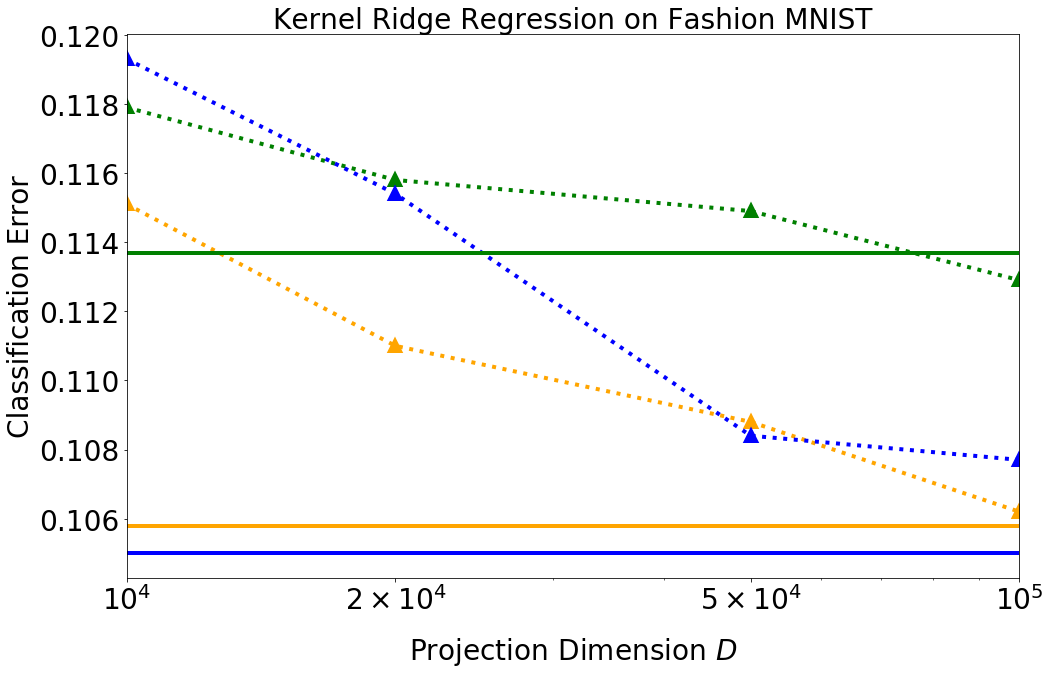

In [144]:
plot_misclassification_errors(
    [rbf_features, sim_orf_2_features, sim_orf_4_features],
    ['RBF Fourier RFs', 'Sim. Optical RFs (m=2)', 'Sim. Optical RFs (m=4)'],
    ['orange', 'green', 'blue', 'red'],
    [rbf_limit, sim_orf_2_limit, sim_orf_4_limit],
    ['RBF Kernel', 'OPU Kernel (m=2)', 'OPU Kernel (m=4)'],
    ['orange', 'green', 'blue', 'red'],
    x_start=10000, x_end=100000, x_ticks=[r'$10^4$', r'$2 \times 10^4$', r'$5 \times 10^4$', r'$10^5$'], legend=False
)